In [1]:
import os

import torch
import torchvision
from torchvision import models
from torchvision import transforms

from src.explainability.GradCam import GradCam
from src.utils.ImageDisplayerGradCam import ImageDisplayerGradCam
from src.data.ImageNet300 import ImageNet300Dataset
from src.utils.getimagenetclasses import get_classes

# Example explainations

In [2]:
resnet_no_pretrain = models.resnet18()
resnet_no_pretrain.eval()

resnet_pretrained = models.resnet18(pretrained = True)
resnet_pretrained.eval()
pass

In [3]:
root_dir = 'Data/imagenetval300imgs/imagenet300'
xmllabeldir = "Data/imagenetval300imgs/val"
synsetfile = "Data/imagenetval300imgs/synset_words.txt"


image_transforms =  transforms.Compose([
          transforms.Resize((256,256)),
          transforms.ToTensor(),
          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])


dataset = ImageNet300Dataset(root_dir, xmllabeldir, synsetfile, 300, image_transforms)
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 1, shuffle = False)

classes = get_classes()

## Non-trained model:

In [4]:
target_layer = resnet_no_pretrain.layer4[-1].conv2
cam = GradCam(resnet_no_pretrain, target_layer, 10, multi_label = False)

image_dispalyer = ImageDisplayerGradCam(resnet_no_pretrain, 
        cam, 
        classes,
        reshape = transforms.Resize((256,256)), 
        multi_label = False, 
        image_dir = 'image_net_dir',
        pdf = False)

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


True class: English foxhound 167
Predictions: thresher, thrasher, threshing machine 856
Displaying true labels
Focus class: 167
image_net_dir/ILSVRC2012_val_00000028_heatmap_167.png


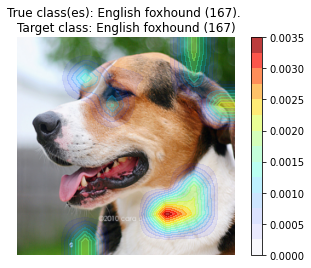

True class: English foxhound 167
Predictions: thresher, thrasher, threshing machine 856
Displaying predictions
Focus class: 856
image_net_dir/ILSVRC2012_val_00000028_heatmap_856.png


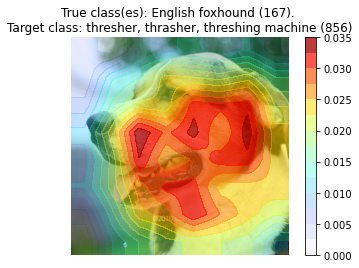

In [5]:
for sample in dataloader:
    image_dispalyer.display_images(sample, display_labels_or_predictions = True)
    image_dispalyer.display_images(sample, display_labels_or_predictions = False)
    break

## Pretrained net

In [ ]:
target_layer = resnet_pretrained.layer4[-1].conv2
cam = GradCam(resnet_pretrained, target_layer, 10, multi_label = False)

image_dispalyer = ImageDisplayerGradCam(resnet_pretrained, 
        cam, 
        classes,
        reshape = transforms.Resize((256,256)), 
        multi_label = False, 
        image_dir = 'image_net_dir',
        pdf = False)

In [ ]:
for sample in dataloader:
    image_dispalyer.display_images(sample, display_labels_or_predictions = True)
    image_dispalyer.display_images(sample, display_labels_or_predictions = False)
    break